In [1]:
# importing all necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# link to import the dataset from Kaggle:https://www.kaggle.com/neuromusic/avocado-prices
df = pd.read_csv('avocado.csv')

In [96]:
# Basic information from the dataset
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [97]:
# Cleaned dataset, thus no null value present
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [98]:
# 4046: PLU 4046
# 4225: PLU 4225
# 4770: PLU 4770
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [99]:
# Since datatype of Date field is string, convert it into DateTime
type(df['Date'].iloc[0])

str

In [100]:
df['Date'] = pd.to_datetime(df['Date'])

<Figure size 864x360 with 0 Axes>

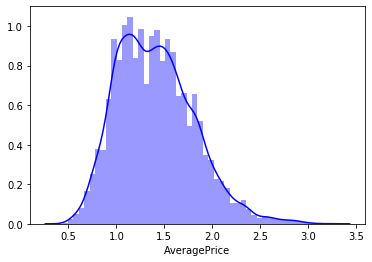

<Figure size 864x360 with 0 Axes>

In [101]:
# The average price of avocados ranges from 1.2 to 1.6 
sns.distplot(df['AveragePrice'], color='blue',bins=50)
plt.figure(figsize=(12,5))

In [102]:
# two types of Avocados
df['type'].unique() 

array(['conventional', 'organic'], dtype=object)

In [103]:
# the dataset is of 4 years
df['year'].unique() 

array([2015, 2016, 2017, 2018])

In [104]:
# the dataset of 54 unique regions
df['region'].nunique() 

54

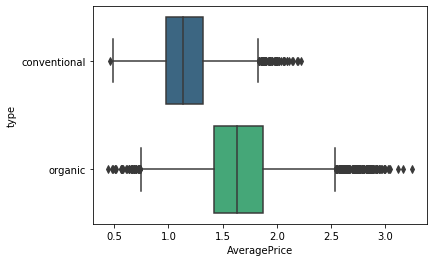

In [105]:
# organic avocados are more expensive than conventional ones
sns.boxplot(x='AveragePrice', y='type', data=df, palette='viridis') 

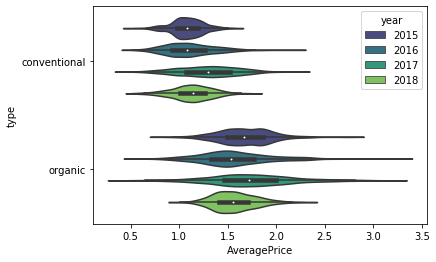

In [106]:
# many changes in prices for both the types over the past given years
sns.violinplot(x='AveragePrice', y='type', hue='year', data=df, palette='viridis') 

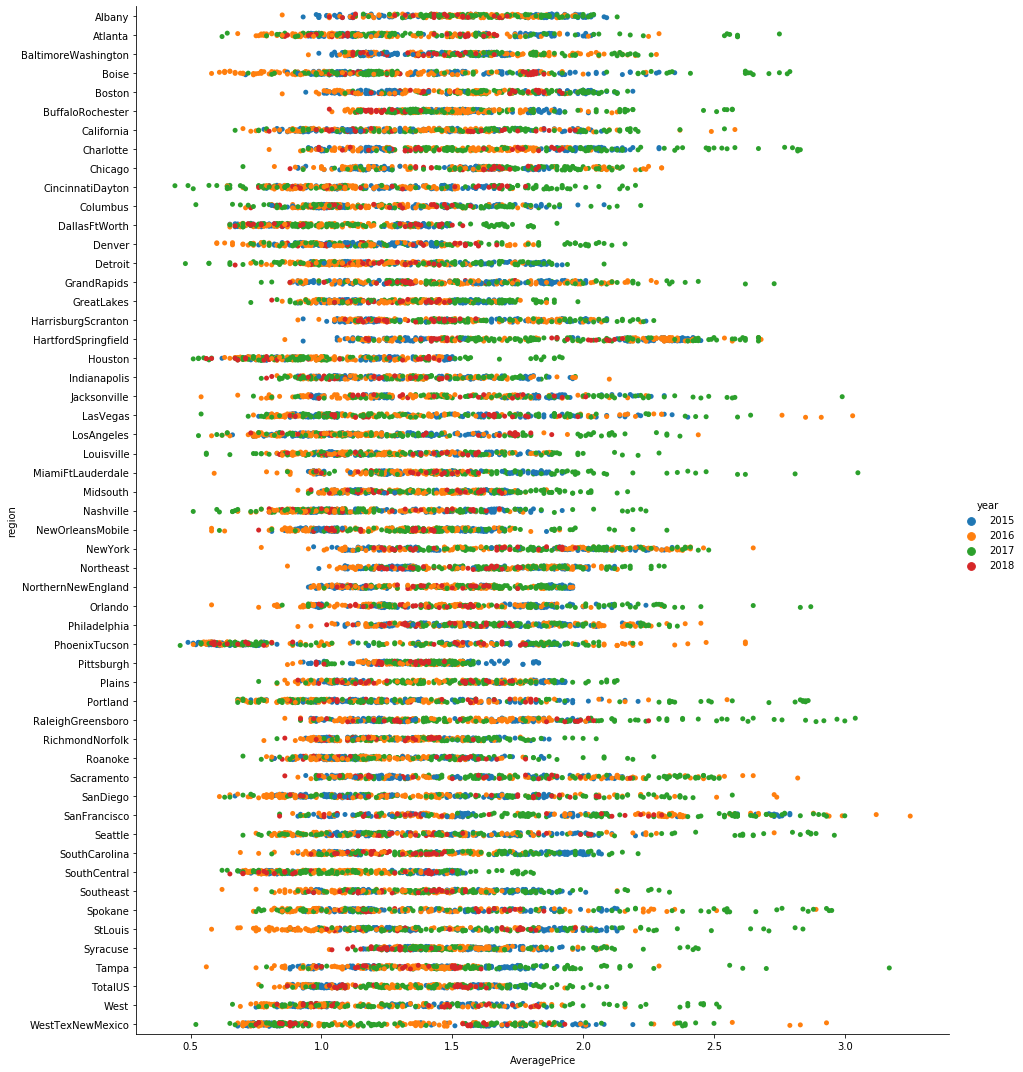

In [107]:
sns.catplot(x='AveragePrice', y='region', hue='year', data=df, height=15, aspect=0.9, kind='strip')

In [108]:
#extracting month from Date frame
df['month'] = df['Date'].apply(lambda time: time.month)
df['month'] = df['month'].map({1:'January', 2:'Feburary', 3:'March', 4:'April', 5:'May', 6:'June',
                               7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})

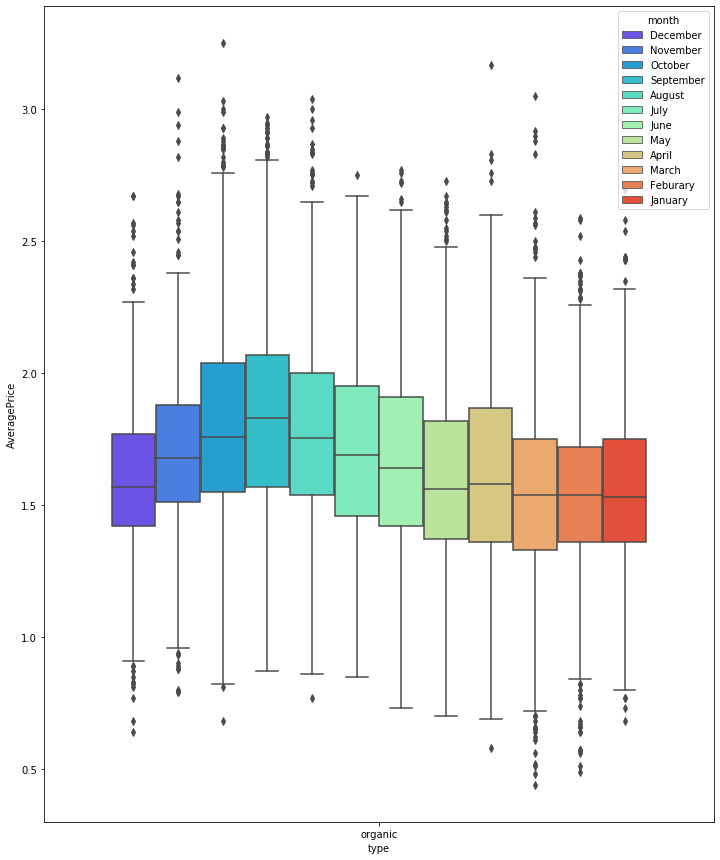

In [109]:
# visualizing organic type over all region: prices went high during September and fall back by end of the year
plt.figure(figsize=(12,15))
sns.boxplot(x='type', y='AveragePrice', hue='month', data=df, palette='rainbow', order=['organic'])

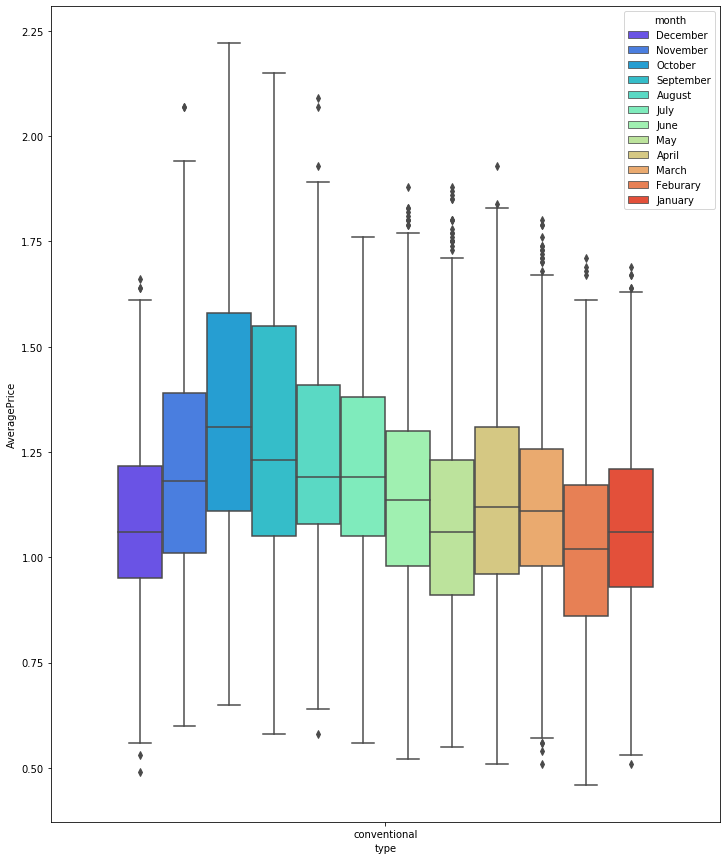

In [110]:
# visualizing conventional type over all region: prices went high during October and fall back by end of the year
plt.figure(figsize=(12,15))
sns.boxplot(x='type', y='AveragePrice', hue='month', data=df, palette='rainbow', order=['conventional'])

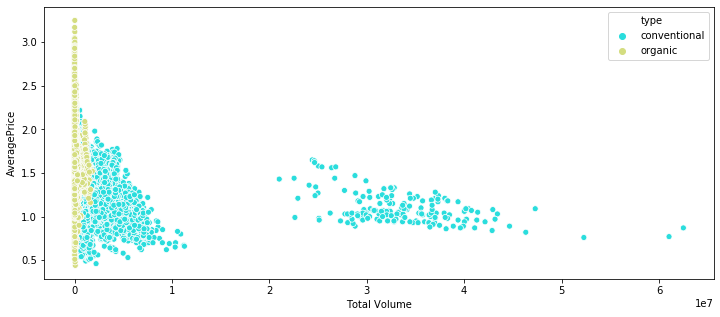

In [111]:
# more sales for conventional avocados, however prices for organic avocados remained stagnant
plt.figure(figsize=(12,5))
sns.scatterplot(x='Total Volume', y='AveragePrice', hue='type', data=df, palette='rainbow', x_jitter=True, y_jitter=True)

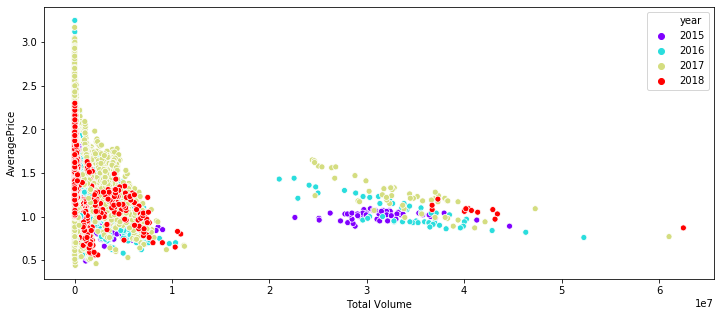

In [112]:
# sales incresead rapidly during 2017 however there was a gradually fall in 2018
plt.figure(figsize=(12,5))
sns.scatterplot(x='Total Volume', y='AveragePrice', hue='year', data=df, palette='rainbow')

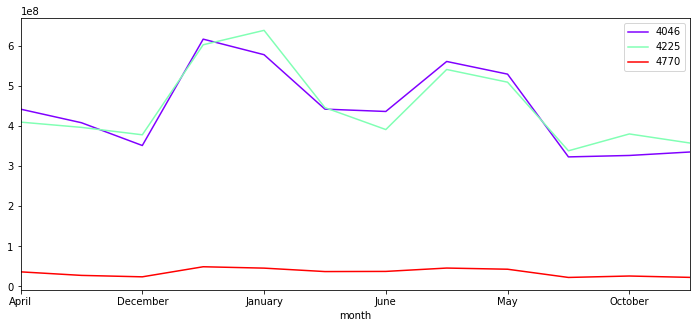

In [114]:
# visualizing sales on basis of avocados with PLUs
by_variety = df[['4046', '4225', '4770']].groupby(by=df['month']).sum()
by_variety.plot(figsize=(12,5), cmap='rainbow', kind='line')